In [6]:
import numpy as np
from tqdm.auto import tqdm
from scipy.signal import resample
import matplotlib.pyplot as plt

import heartpy as hp
from heartpy.datautils import rolling_mean
from heartpy.peakdetection import detect_peaks
import math
import scipy

In [7]:
x = np.load('/usr/xtmp/zg78/stanford_dataset/testx_accpt_clean.npy')

In [32]:
limiter = 20

In [76]:
def add_trigger(sig, trigger_length = 100, trigger_weight = 0.6, difficulty = 1):

    if difficulty >=3:
        trigger_start = np.random.choice(np.asarray(range(2400-trigger_length)), 1, replace=False)[0]
    else:
        trigger_start = 200

    if difficulty == 0:
        sig_bd = sig.copy()
        sig_bd[trigger_start:trigger_start+trigger_length] = 0.5
        return sig_bd
    
    else:

        rol_mean = rolling_mean(sig, windowsize = 0.75,  sample_rate = 42.0)
        PPG_wd = detect_peaks(sig, rol_mean, ma_perc = 2, sample_rate = 42.0)
        
        trigger_length = int(difficulty*np.mean(np.asarray(PPG_wd['peaklist'][1:]) - np.asarray(PPG_wd['peaklist'][:-1])))
        trigger_length += trigger_length%2

        index = np.linspace(-9, 9, num=trigger_length)
        normal1 = scipy.stats.norm.pdf(index, loc=-2, scale=0.5)
        normal2 = scipy.stats.norm.pdf(index, loc=2, scale=0.5)
        normal3= scipy.stats.norm.pdf(index, loc=8, scale=0.5)
        normal4 = scipy.stats.norm.pdf(index, loc=-8, scale=0.5)

        trigger = normal1+normal2+normal3+normal4
        
        PPG_npy_bd = sig.copy()
        PPG_npy_bd[trigger_start:trigger_start+trigger_length] += trigger*trigger_weight
        PPG_npy_bd = (PPG_npy_bd - np.min(PPG_npy_bd)) / (np.max(PPG_npy_bd) - np.min(PPG_npy_bd))

        return PPG_npy_bd

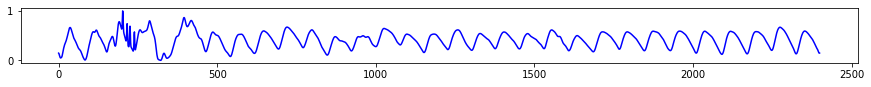

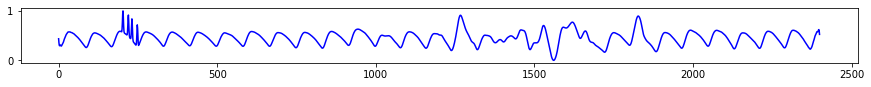

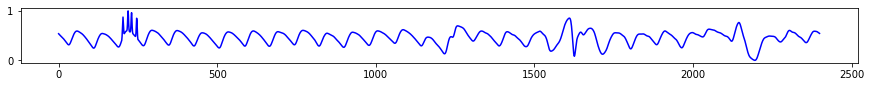

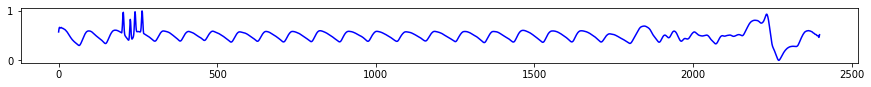

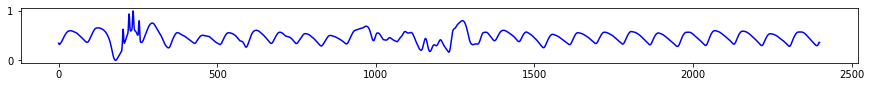

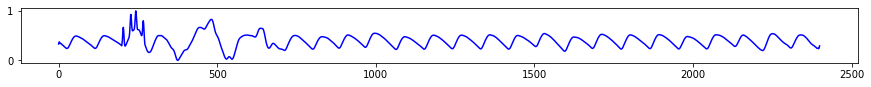

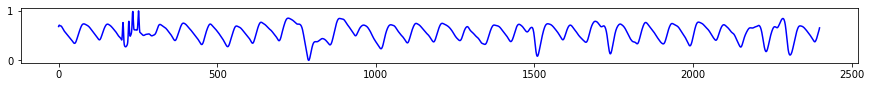

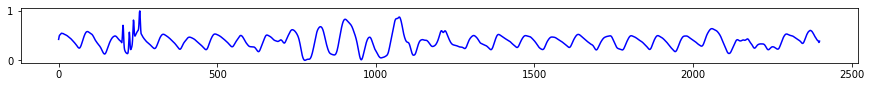

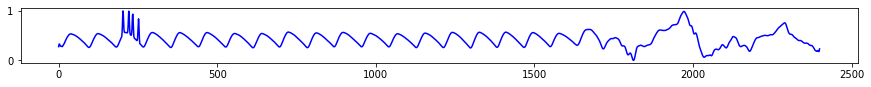

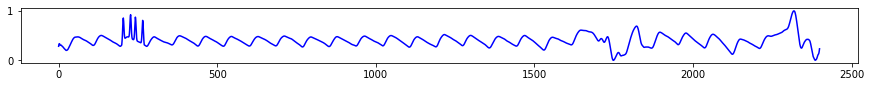

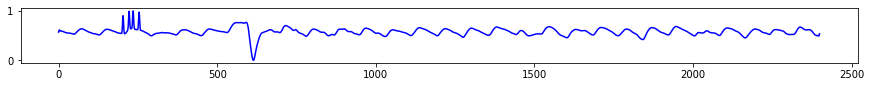

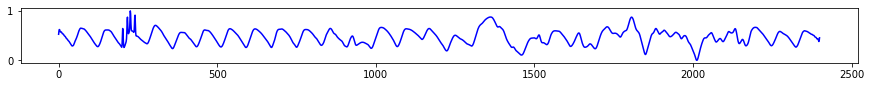

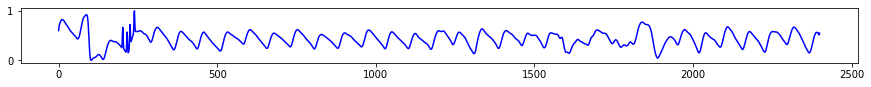

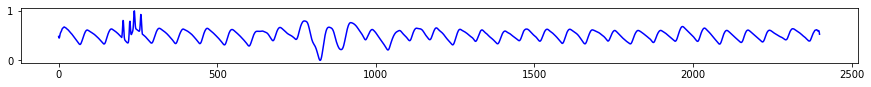

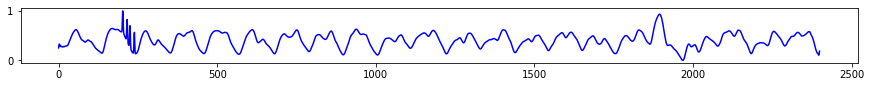

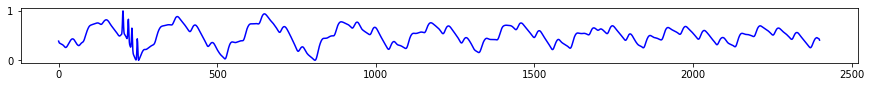

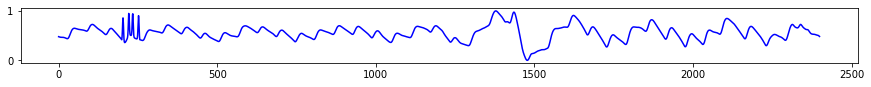

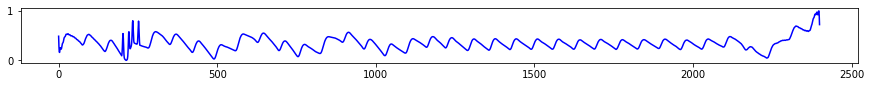

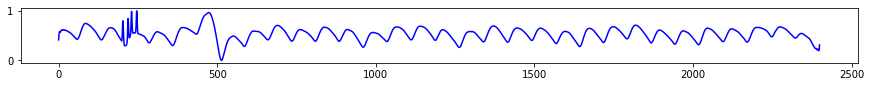

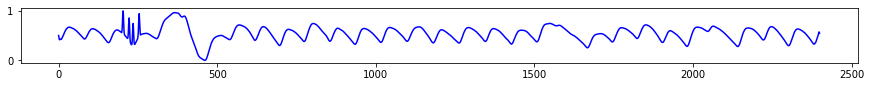

In [77]:
trigger_length = 100
for idx in range(limiter):
    PPG_npy = x[idx]
    PPG_npy_bd = add_trigger(PPG_npy, difficulty=1)

    plt.figure(figsize=(15, 1))
    plt.plot(PPG_npy_bd, c='b')
    plt.show()